In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In C:\Users\akhil\Anaconda3\envs\first\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\akhil\Anaconda3\envs\first\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\akhil\Anaconda3\envs\first\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\akhil\Anaconda3\envs\first\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\akhil\Anaconda3\envs\first\lib\site-

In [3]:
path=r"C:\Users\akhil\OneDrive\Pictures\nice images\wp3156016.jpg"

In [119]:
img=cv2.imread(path)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

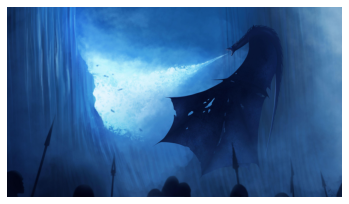

In [129]:
plt.imshow(img)
plt.axis('off')
plt.show()

# flipping

In [8]:
flipped_x = cv2.flip(img, 0)  # 0 for  x-axis
flipped_y = cv2.flip(img, 1)  # 1 for  y-axis
flipped_xy= cv2.flip(img, -1)  # -1 for  a-axis and y-axis

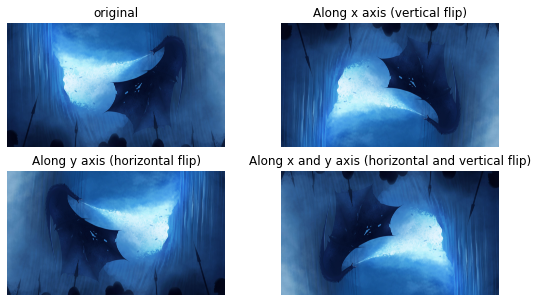

In [23]:
f, axarr = plt.subplots(2,2, figsize=(9, 5))

axarr[0,0].imshow(img)
axarr[0,0].axis('off')
axarr[0,0].set_title('original')

axarr[0,1].imshow(flipped_x)
axarr[0,1].axis('off')
axarr[0,1].set_title('Along x axis (vertical flip)')

axarr[1,0].imshow(flipped_y)
axarr[1,0].axis('off')
axarr[1,0].set_title('Along y axis (horizontal flip)')

axarr[1,1].imshow(flipped_xy)
axarr[1,1].axis('off')
axarr[1,1].set_title('Along x and y axis (horizontal and vertical flip)')

plt.show()

# rotate

In [24]:
#only for multiple of 90 degree

rotate_90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE) 

rotate_90_counter = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE) 

rotate_180 = cv2.rotate(img, cv2.ROTATE_180) 

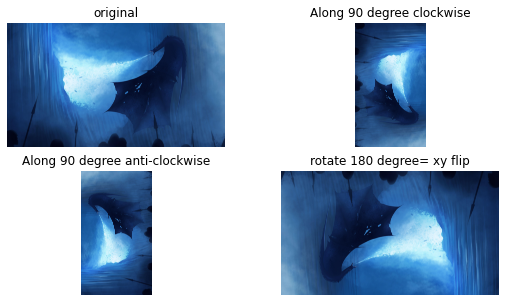

In [27]:
f, axarr = plt.subplots(2,2, figsize=(9, 5))

axarr[0,0].imshow(img)
axarr[0,0].axis('off')
axarr[0,0].set_title('original')

axarr[0,1].imshow(rotate_90)
axarr[0,1].axis('off')
axarr[0,1].set_title('Along 90 degree clockwise')

axarr[1,0].imshow(rotate_90_counter)
axarr[1,0].axis('off')
axarr[1,0].set_title('Along 90 degree anti-clockwise')

axarr[1,1].imshow(rotate_180)
axarr[1,1].axis('off')
axarr[1,1].set_title('rotate 180 degree= xy flip')

plt.show()

In [47]:
import math

angleInDegrees=-90
# rotate at angle for a given image
h, w = img.shape[:2]
#height , width, channel
image_center = (w / 2, h / 2)
M = cv2.getRotationMatrix2D(image_center,angleInDegrees,1)  #center, angle + for anticlockwise -ve for clockwise ,scale

rad = math.radians(angleInDegrees)
b_w = int((h * abs(math.sin(rad))) + (w * abs(math.cos(rad))))
b_h = int((h * abs(math.cos(rad))) + (w * abs(math.sin(rad))))

M[0, 2] += ((b_w / 2) - image_center[0])
M[1, 2] += ((b_h / 2) - image_center[1])

rotate_30 = cv2.warpAffine(img,M,(b_w, b_h), flags=cv2.INTER_LINEAR)


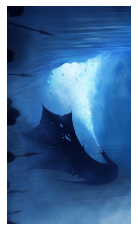

In [48]:
plt.imshow(rotate_30)
plt.axis('off')
plt.show()

# write text in image

In [49]:


'''
cv2.putText(img, text, org, fontFace, fontScale, color, thickness)
img – It is the image on which the text has to be written.
text – It is the text that needs to be put on the image
org – Bottom-left corner of the text string in the image.
fontFace – The font of the text. See the font types available in OpenCV here.
fontScale – This value scales the size of the text by multiplying its base size.
color – The color of the text.
thickness – The thickness of the line of text
'''

'\ncv2.putText(img, text, org, fontFace, fontScale, color, thickness)\nimg – It is the image on which the text has to be written.\ntext – It is the text that needs to be put on the image\norg – Bottom-left corner of the text string in the image.\nfontFace – The font of the text. See the font types available in OpenCV here.\nfontScale – This value scales the size of the text by multiplying its base size.\ncolor – The color of the text.\nthickness – The thickness of the line of text\n'

In [88]:
h,w,c=img.shape # h,w,c
# tuple needed in width, height or x,y format
trc= (0+int(w/10),0+int(h/10)) #top right corner 
tlc= (w-int(w/8),0+int(h/10)) #top left corner 
brc= (0+int(w/10),h-int(h/10)) #bottom right corner 
blc= (w-int(w/8),h-int(h/10)) #bottom left corner 

# write text given rectangle bbox cordinate
#cv2.putText(image, 'Fedex', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

In [109]:
txt_image=cv2.putText(img.copy(), 'Dragon', (2400,240), cv2.FONT_HERSHEY_SIMPLEX, 4, (36, 255, 12), 7, cv2.LINE_AA)

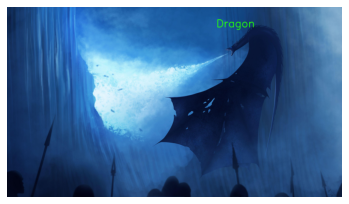

In [110]:
plt.imshow(txt_image)
plt.axis('off')
plt.show()

In [54]:
img.shape

(2180, 3840, 3)

# draw rectangle

In [161]:
start_point = (1830, 230)   # in x,y format
end_point = (3150, 1900) # represents the bottom right corner of rectangle
color = (36, 255, 12) # Red color
thickness = 45 # Line thickness of 7 px

rec_image = cv2.rectangle(img.copy(), start_point, end_point, color, thickness)

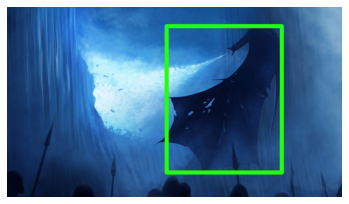

In [162]:
plt.imshow(rec_image)
plt.axis('off')
plt.show()

In [160]:
area=img.shape[0]*img.shape[1]
area//184908

45

In [159]:
811*456//2

184908

In [164]:
244*244//184908

0

# name added based on rectangle coorninates

In [198]:
start_point = (1830, 230)   # in x,y format
end_point = (3150, 1900) # represents the bottom right corner of rectangle
color = (36, 255, 12) # Red color
thickness = 7 # Line thickness of 7 px

h,w,c=img.shape
txt_coordinate=(start_point[0],start_point[1]-20)
if txt_coordinate[1]<0:
    txt_coordinate=(start_point[0],0+int(h/10))
print(txt_coordinate)
rec_image = cv2.rectangle(img.copy(), start_point, end_point, color, thickness)
txt_image=cv2.putText(rec_image.copy(), 'Dragon', txt_coordinate, cv2.FONT_HERSHEY_SIMPLEX, 4, (36, 255, 12), 7, cv2.LINE_AA)

(1830, 210)


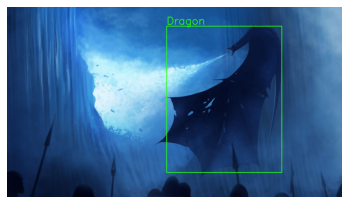

In [199]:
plt.imshow(txt_image)
plt.axis('off')
plt.show()